# Expected goal modelisation

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
from src.utils import split_dataset, evaluation_metrics, print_evaluation_metrics, plot_evaluation
import numpy
import pandas
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.linear_model import LogisticRegression

## Load and split data

In [2]:
data = pandas.read_csv("../data/train/shot_data.csv")
data.head()

,game_id,event_id,team_id,player_id,minute,second,x_shot,y_shot,goal_distance,big_chance,previous_type_name,previous_x,previous_y,is_goal
0,000be874ddf1f5436cb38cfd49fc03c3,2.132958e+09,15,114075,3,50,84.630,26.248,21.795192,0,BallTouch,18.375,38.692,0
1,000be874ddf1f5436cb38cfd49fc03c3,1.259971e+09,15,19729,3,56,95.445,36.040,9.770344,0,Pass,4.095,29.920,0
2,000be874ddf1f5436cb38cfd49fc03c3,1.502744e+09,170,79583,5,57,89.565,36.720,15.672831,0,Save,12.600,30.124,0
3,000be874ddf1f5436cb38cfd49fc03c3,1.685521e+09,170,134331,6,0,78.120,38.284,27.219241,0,Pass,5.250,33.320,0
4,000be874ddf1f5436cb38cfd49fc03c3,1.157283e+09,15,29463,11,48,85.260,38.148,20.171106,0,Clearance,14.175,24.276,0


In [3]:
x_train, y_train, x_test, y_test = split_dataset(data, 0.2, "is_goal")

## Feature Enginnering

In [55]:
numeric_features = ["minute", "second", "x_shot", "y_shot", "goal_distance", "previous_x", "previous_y"]
categorical_features = ["previous_type_name"]

In [56]:
feature_engineering = DataFrameMapper([
        (numeric_features, StandardScaler()),
        (categorical_features[0], LabelBinarizer())])

## Modelisation

In [120]:
# model = xgb.XGBClassifier(n_estimators=100, objective="binary:logistic", random_state=42)
model = LogisticRegression()

## Pipeline

In [121]:
pipeline = Pipeline(steps=[
            ("feature_engineering", feature_engineering),
            ("model", model)])

In [122]:
pipeline.fit(x_train[numeric_features + categorical_features], y_train)

Pipeline(memory=None,
     steps=[('feature_engineering', DataFrameMapper(default=False, df_out=False,
        features=[(['minute', 'second', 'x_shot', 'y_shot', 'goal_distance', 'previous_x', 'previous_y'], StandardScaler(copy=True, with_mean=True, with_std=True)), ('previous_type_name', LabelBinarizer(neg_label=0, pos_labe...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

## Evaluation

F1  :  0.5609418282548476
ACCURACY  :  0.9182252031471688
ROC AUC SCORE  :  0.7258168821627673


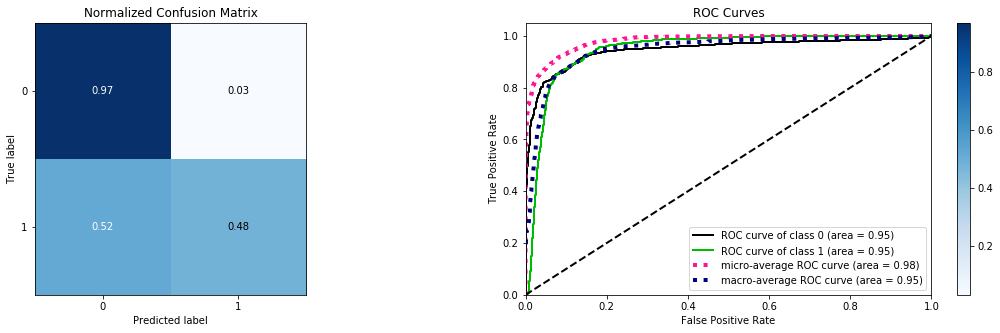

In [123]:
y_pred = pipeline.predict(x_test[numeric_features + categorical_features])
y_pred_proba = pipeline.predict_proba(x_test[numeric_features + categorical_features])

metrics = evaluation_metrics(y_test, y_pred)
print_evaluation_metrics(metrics)
plot_evaluation(y_test, y_pred, y_pred_proba)

In [124]:
data["xg"] = [y[1] for y in pipeline.predict_proba(data)]

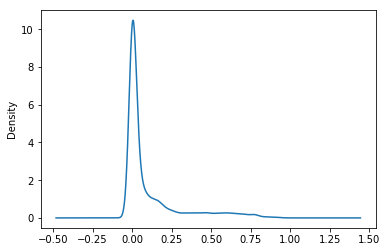

In [125]:
data["xg"].plot.kde()

In [126]:
data.query('xg>0.6')

,game_id,event_id,team_id,player_id,minute,second,x_shot,y_shot,goal_distance,big_chance,previous_type_name,previous_x,previous_y,is_goal,xg
26,000be874ddf1f5436cb38cfd49fc03c3,1.833631e+09,170,134331,71,41,85.680,36.312,19.457845,0,Pass,88.620,0.000,0,0.656157
49,001fa006f29278f69474d0dbb6edca19,1.920703e+09,14,327683,57,20,98.175,32.368,7.017410,1,Pass,52.395,33.932,1,0.625073
52,001fa006f29278f69474d0dbb6edca19,1.200624e+09,14,106981,69,43,98.700,30.600,7.158911,0,Pass,99.330,65.824,0,0.872617
65,004ca21c2949fc2cf749ea5fbb4ce841,1.208382e+09,13,44120,13,47,103.530,34.884,1.715330,1,Pass,52.395,34.272,1,0.773245
70,004ca21c2949fc2cf749ea5fbb4ce841,1.571474e+09,13,73078,47,5,96.495,31.280,8.929357,1,Pass,81.060,65.484,1,0.745909
120,006800fdc3d338a66c977dca42d662b7,8.850229e+08,26,68312,47,47,95.550,29.852,10.320291,0,Pass,104.475,67.660,0,0.845775
134,006800fdc3d338a66c977dca42d662b7,2.632455e+08,162,12124,81,16,99.645,37.740,6.531740,1,Pass,52.605,33.932,1,0.630860
156,00af13c3ce0b75aab3582b1716efb14b,1.610818e+09,96,3860,80,27,99.435,34.612,5.598551,1,Pass,52.605,33.320,1,0.671359
163,00af13c3ce0b75aab3582b1716efb14b,3.161123e+08,175,22079,91,59,102.165,32.640,3.144332,1,Pass,52.290,34.068,1,0.717528
184,00c295a2e21a13c063aec4be88267d80,1.847319e+09,167,91267,71,8,97.650,32.232,7.559651,1,Pass,52.290,33.592,1,0.607913


In [127]:
data["xg"].describe()

count    3.876100e+04
mean     1.045088e-01
std      1.900010e-01
min      2.825706e-08
25%      6.314732e-04
50%      1.139677e-02
75%      1.107045e-01
max      9.617039e-01
Name: xg, dtype: float64

In [119]:
numpy.unique(data["xg"])

array([2.80480948e-04, 2.89024436e-04, 3.25645000e-04, ...,
       9.97338235e-01, 9.97489572e-01, 9.97581840e-01])